# Cluster Analysis

### Clean data, make it numerical

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [110]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [111]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [112]:
df.Marital_Status

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2240, dtype: object

In [113]:
df.Education.dropna()

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

 ### Education
- PhD : 1
- Master : 2
- Graduation: 3
- 2n Cycle : 4
- Basic : 5

In [114]:
df.Education.replace(to_replace = ['PhD', 'Master', 'Graduation', '2n Cycle', 'Basic'], value = [1, 2, 3,4,5 ], inplace = True)

### Marital_Status
- Married : 1
- Singel: 2
- Divorced : 3
- Together : 4 
- Widow : 5
- Alone: 6
- YOLO: 7
- Absurd: 8

In [115]:
df.Marital_Status.replace(to_replace = ['Married', 'Single', 'Divorced', 'Together', 'Widow', 'Alone', 'YOLO', 'Absurd'], value = [1, 2, 3,4,5,6,7,8 ], inplace = True)

### Do Kmeans Clustering

- elbow method to decide no. of cluster
- use Kmeans algorithm to get clusters
- Add cluster/labels to dataframe
- Visualize the spread of clusters on a scatterplot
- Use clusterlabels together with groupby and unstack
- How does the clusters relate to; income, kids, teens, products, ages, marital, education?

In [116]:
import matplotlib.pyplot as plt


In [117]:
import seaborn as sns

In [118]:
df.dropna(inplace=True)

In [119]:
x =  df.select_dtypes('number')

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [121]:
# Scale the data
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-0.0198093 , -0.98644293,  0.45773285, ...,  0.        ,
         0.        ,  2.37795178],
       [-1.05100909, -1.23680074,  0.45773285, ...,  0.        ,
         0.        , -0.42052997],
       [-0.44552551, -0.31882209,  0.45773285, ...,  0.        ,
         0.        , -0.42052997],
       ...,
       [ 0.51764587,  1.01641959,  0.45773285, ...,  0.        ,
         0.        , -0.42052997],
       [ 0.81469298, -1.06989553, -0.53769011, ...,  0.        ,
         0.        , -0.42052997],
       [ 1.17484335, -1.23680074, -1.53311308, ...,  0.        ,
         0.        ,  2.37795178]])

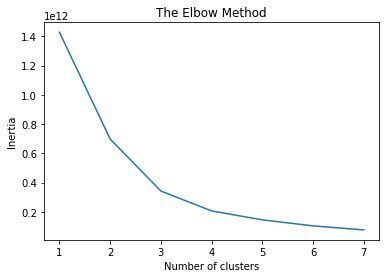

In [122]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 8), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [123]:
# Building the cluster model
kmeans = KMeans(4)

In [124]:
cluster = kmeans.fit(x)

In [125]:
df_c = pd.read_csv('marketing_campaign.csv', sep="\t").dropna()

In [126]:
df_c["clusters"] = cluster.labels_

In [127]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,3,2,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,3,2,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,3,4,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,3,4,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,1,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,3,1,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,1,4,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,3,3,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,2,4,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [128]:
df_c.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'clusters'],
      dtype='object')

In [129]:
df_c.clusters.value_counts()

3    788
1    740
0    687
2      1
Name: clusters, dtype: int64

In [130]:
df_c.loc[df_c["clusters"]==3]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,3
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,3
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0,3
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,3
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,3


In [131]:
# Dropping the one person in cluster three because he is an outlier
df_c.drop(index=2233, inplace=True)

In [132]:
# The different types of educations, distributed over cluster

# Cluster

df_c.groupby(["clusters", "Education"])["Income"].count().unstack().fillna(0).astype(int)

Education,2n Cycle,Basic,Graduation,Master,PhD
clusters,,,,,
0,52,0,365,106,164
1,84,54,375,108,119
3,64,0,375,151,198


In [133]:
# Cluster earns less money and have lower education

df_c.groupby(["clusters", "Marital_Status"])["Income"].mean().unstack().fillna(0).astype(int).drop(columns=["YOLO", "Absurd"])

Marital_Status,Alone,Divorced,Married,Single,Together,Widow
clusters,,,,,,
0,0,77192,76318,78495,77177,74078
1,35018,28010,28275,27912,28685,30700
3,61331,52910,52669,52054,52108,51329


# Which campaing is more intresting for investing

In [134]:
# Avg success rate of Campaign is 7 %
# But if we target the right campaigns to the right segments we can increase campaign sucess rate

160/2200



0.07272727272727272

In [135]:
# 18 % said yes to campagin 1

camp_1 = df_c.groupby(["clusters"])["AcceptedCmp1"].mean().fillna(0)

<AxesSubplot:xlabel='clusters'>

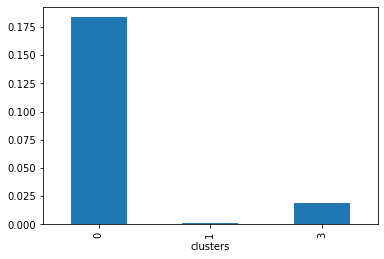

In [136]:
camp_1.plot(kind= 'bar')

In [137]:
camp_2 = df_c.groupby(["clusters"])["AcceptedCmp2"].mean().fillna(0)

In [138]:
camp_2

clusters
0    0.026201
1    0.000000
3    0.015228
Name: AcceptedCmp2, dtype: float64

In [139]:
camp_3 = df_c.groupby(["clusters"])["AcceptedCmp3"].mean().fillna(0)

In [140]:
camp_4 = df_c.groupby(["clusters"])["AcceptedCmp4"].mean().fillna(0)

In [141]:
camp_5 = df_c.groupby(["clusters"])["AcceptedCmp5"].mean().fillna(0)

(0.0, 0.25)

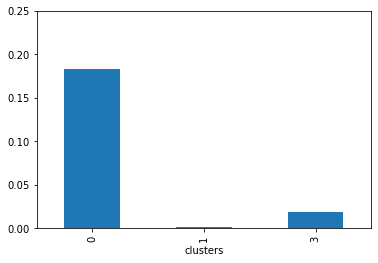

In [142]:
camp_1.plot(kind= 'bar')
plt.ylim([0,0.25])


(0.0, 0.25)

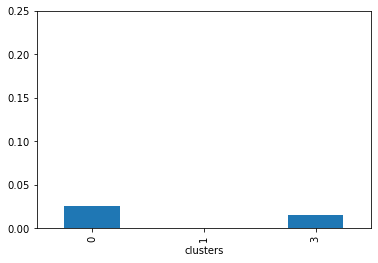

In [143]:
camp_2.plot(kind= 'bar')
plt.ylim([0,0.25])



(0.0, 0.25)

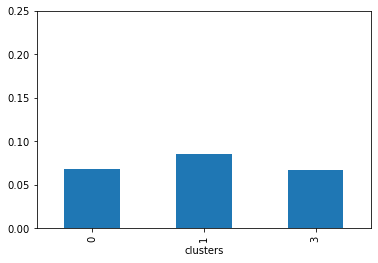

In [144]:
camp_3.plot(kind= 'bar')
plt.ylim([0,0.25])




(0.0, 0.25)

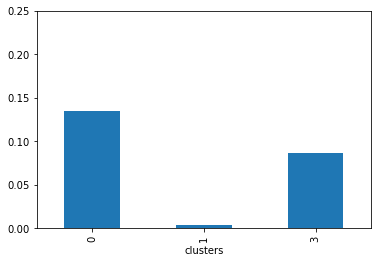

In [145]:
camp_4.plot(kind= 'bar')

plt.ylim([0,0.25])



(0.0, 0.25)

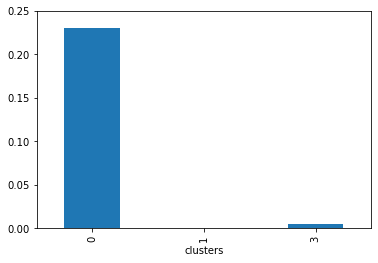

In [146]:
camp_5.plot(kind= 'bar')
plt.ylim([0,0.25])




-  we are going to do the graphics 

In [147]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,3,2,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,3,2,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,3,4,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,3,4,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,1,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,3,1,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,1,4,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,3,3,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,2,4,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [148]:
pd.options.display.max_columns = None

In [149]:
df['Complain']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Complain, Length: 2216, dtype: int64

In [150]:
# WE ARE GOING TO DETERMINE THE CORRELATION BETWEEN ALL THE DATA FRAME


In [151]:
df_c["Income_Cat"] = pd.qcut(x=df_c["Income"], labels =["Poor", "Below Average", "Above Average", "Rich", "Very Rich"], q = [0,0.25,0.5,0.75,0.95,1])

In [ ]:
df_c.groupby("Income_Cat")["NumWebVisitsMonth"].count()

# What are the personal attributes of the clusters?

In [ ]:
c0 = df_c.loc[df_c["clusters"]==0]
c1 =df_c.loc[df_c["clusters"]==1]
c2 =df_c.loc[df_c["clusters"]==2]

# What are the personal atributes of clusters?

 - Income
 - Kids
 - Teens
 - Age
 - Marital_Status

# Related to CLUSTER 0

# Education

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c0.Education.value_counts(), labels=c0.Education.value_counts().index)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Income

In [ ]:
df

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c0.Income.value_counts(), labels=c0.Income.value_counts().index)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Marital Status

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c0.Marital_Status.value_counts(), labels=c0.Marital_Status.value_counts().index)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Kid home

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c0.Kidhome.value_counts(), labels=c0.Kidhome.value_counts().index)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Teen home

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c0.Teenhome.value_counts(), labels=c0.Teenhome.value_counts().index)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Cluster 1

# Education

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c1.Education.value_counts(), labels=c1.Education.value_counts().index)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Income

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c1.Income.value_counts(), labels=c1.Income.value_counts().index)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Marital status

In [ ]:
c1.Marital_Status.value_counts().index.shape

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c1.Marital_Status.value_counts(), labels=c1.Marital_Status.value_counts().index)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Kid home

In [ ]:
c1.Kidhome.value_counts().index.shape

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c1.Kidhome.value_counts(), labels=c1.Kidhome.value_counts().index)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Teen home

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c1.Teenhome.value_counts(), labels=c1.Teenhome.value_counts().index)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Related to CLUSTER 2

# Education

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c2.Education.value_counts(), labels=c2.Education.value_counts().index)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Income

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c2.Income.value_counts(), labels=c2.Income.value_counts().index)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Marital Status

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c2.Marital_Status.value_counts(), labels=c2.Marital_Status.value_counts().index)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Kid Home

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c2.Kidhome.value_counts(), labels=c2.Kidhome.value_counts().index)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Teen Home

In [ ]:
plt.figure(figsize=(11, 7))

plt.pie(c2.Teenhome.value_counts(), labels=c2.Teenhome.value_counts().index)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

#  1 - What Does the clusters buy?
- Type of goods
- Nr of visits
- Nro of web visits

In [ ]:
df

- MntWines

In [ ]:
df_c.groupby(["clusters"])["MntWines"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="MntWines", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#dcb53f')

plt.show()



- MntFruits

In [ ]:
df_c.groupby(["clusters"])["MntFruits"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="MntFruits", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#81ed85')

plt.show()




- MntMeatProducts

In [ ]:
df_c.groupby(["clusters"])["MntMeatProducts"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="MntMeatProducts", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#52d298')

plt.show()

- MntFishProducts

In [ ]:

df_c.groupby(["clusters"])["MntFishProducts"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="MntFishProducts", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#dd9933')

plt.show()

- 5 MntSweetProducts

In [ ]:
df_c.groupby(["clusters"])["MntSweetProducts"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="MntSweetProducts", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#f37553')

plt.show()

- 6 MntGoldProds

In [ ]:
df_c.groupby(["clusters"])["MntGoldProds"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="MntGoldProds", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#bfff00')

plt.show()

# Which are the most important meads for our clients use for buying

# Number of web visits month

In [ ]:
df_c.groupby(["clusters"])["NumWebVisitsMonth"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="NumWebVisitsMonth", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#bfff00')

plt.show()

# Number of Deal Purchased

In [ ]:
df_c.groupby(["clusters"])["NumDealsPurchases"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="NumDealsPurchases", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#FFD700')

plt.show()

# Number of catalog purchased

In [ ]:
df_c.groupby(["clusters"])["NumCatalogPurchases"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="NumCatalogPurchases", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#E9967A')

plt.show()

# Number of store purchased

In [ ]:
df_c.groupby(["clusters"])["NumStorePurchases"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="NumStorePurchases", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#9BCD9B')

plt.show()

# Number of web purchased

In [ ]:

df_c.groupby(["clusters"])["NumWebPurchases"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="NumWebPurchases", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#BF3EFF')

plt.show()

# Number of web visits per month

In [ ]:
df_c.groupby(["clusters"])["NumWebVisitsMonth"].mean()
plt.figure(figsize=(10, 7))
sns.barplot(
    y="NumWebVisitsMonth", 
    x="clusters", 
    data=df_c,
    estimator=np.mean, 
    color='#EE7600')

plt.show()